<a href="https://colab.research.google.com/github/abroraxatov1/dataset1/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Load the dataset

df = pd.read_csv("soil_measures.csv")

# Data Exploration
print("Dataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None

Descriptive Statistics:
                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.000000     6.425045
75%      84.250000    68.000000    49.000000     6.923643
max     140.000000   145.000000   205.000000     9.935091

Missi

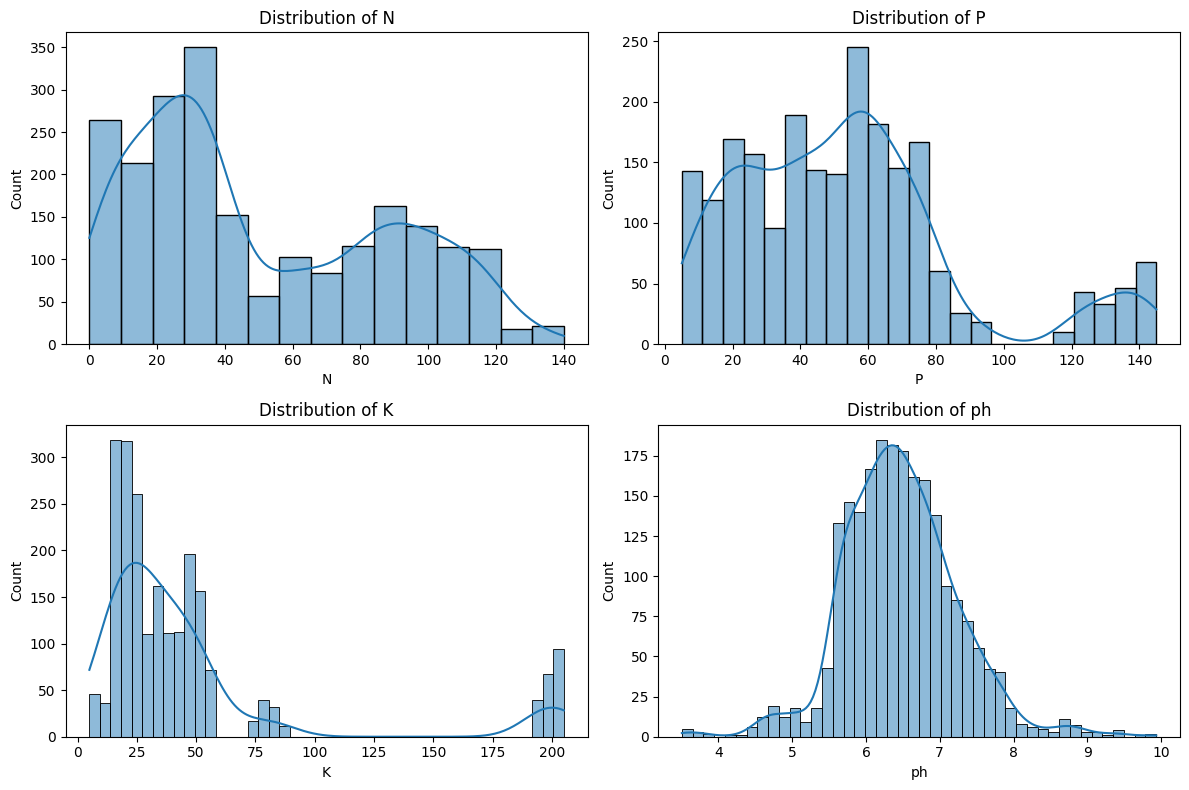

In [2]:
# Visualize feature distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(['N', 'P', 'K', 'ph']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



In [3]:
# Preprocessing
# Select numerical features for clustering
X = df[['N', 'P', 'K', 'ph']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [4]:
# Model 1: K-Means Clustering
kmeans_scores = []
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    kmeans_scores.append((k, score))
    print(f"K-Means (k={k}) Silhouette Score: {score:.3f}")

# Select best K-Means model (k=4)
kmeans_best = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans_best.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"Best K-Means (k=4) Silhouette Score: {kmeans_silhouette:.3f}")



K-Means (k=3) Silhouette Score: 0.367
K-Means (k=4) Silhouette Score: 0.383
K-Means (k=5) Silhouette Score: 0.342
Best K-Means (k=4) Silhouette Score: 0.383


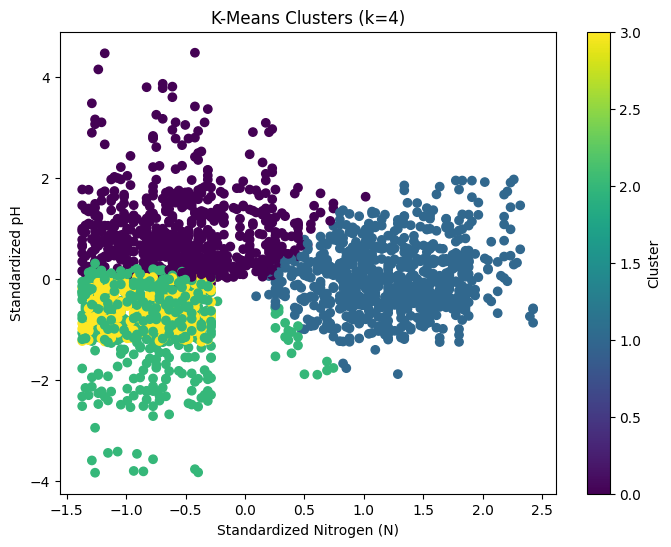

In [7]:
# Visualize K-Means clusters (N vs. pH)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 3], c=kmeans_labels, cmap='viridis')
plt.xlabel('Standardized Nitrogen (N)')
plt.ylabel('Standardized pH')
plt.title('K-Means Clusters (k=4)')
plt.colorbar(label='Cluster')
plt.show()



In [5]:
# Model 2: DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
# Filter out noise points for silhouette score
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    valid_labels = dbscan_labels[dbscan_labels != -1]
    valid_data = X_scaled[dbscan_labels != -1]
    dbscan_silhouette = silhouette_score(valid_data, valid_labels)
else:
    dbscan_silhouette = -1  # Invalid if only one cluster or all noise
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}, Clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")



DBSCAN Silhouette Score: 0.573, Clusters: 2


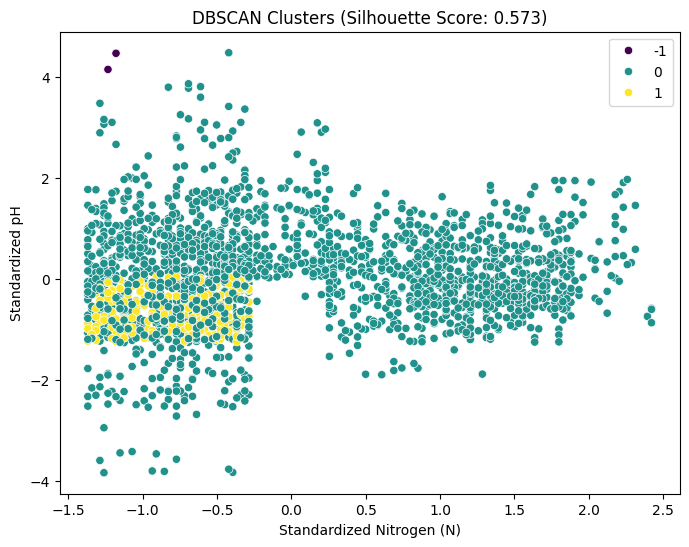

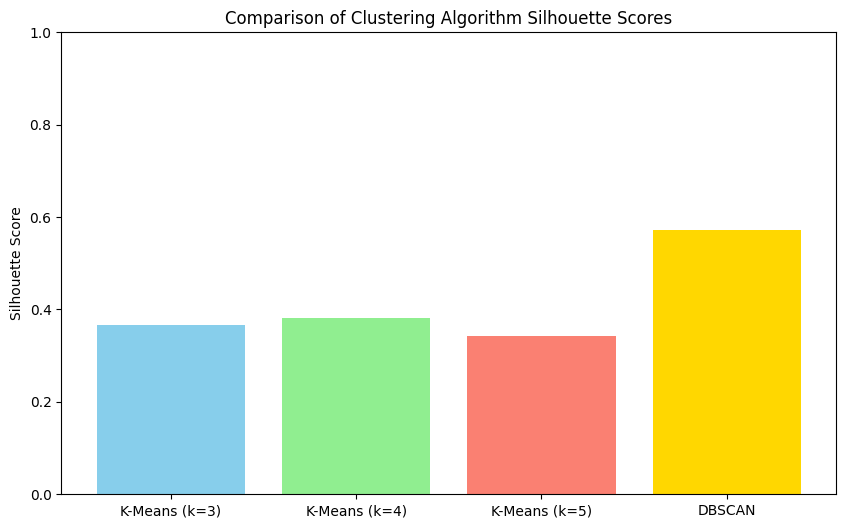

In [15]:

import matplotlib.pyplot as plt
# Model 2: DBSCAN (continued)
# Visualize DBSCAN clusters (N vs. pH)
plt.figure(figsize=(8, 6))
# Use hue for coloring by cluster, separating noise (-1)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 3], hue=dbscan_labels, palette='viridis', legend='full')
plt.xlabel('Standardized Nitrogen (N)')
plt.ylabel('Standardized pH')
plt.title(f'DBSCAN Clusters (Silhouette Score: {dbscan_silhouette:.3f})')
plt.show()

# Plot silhouette scores for comparison
silhouette_scores = [
    ('K-Means (k=3)', kmeans_scores[0][1]),
    ('K-Means (k=4)', kmeans_scores[1][1]),
    ('K-Means (k=5)', kmeans_scores[2][1]),
    ('DBSCAN', dbscan_silhouette if dbscan_silhouette != -1 else 0) # Handle invalid score for plotting
]

labels, scores = zip(*silhouette_scores)

plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Algorithm Silhouette Scores')
plt.ylim(0, 1)
plt.show()

In [6]:
# Model 3: Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg.fit_predict(X_scaled)
agg_silhouette = silhouette_score(X_scaled, agg_labels)
print(f"Agglomerative Clustering (k=4) Silhouette Score: {agg_silhouette:.3f}")



Agglomerative Clustering (k=4) Silhouette Score: 0.358


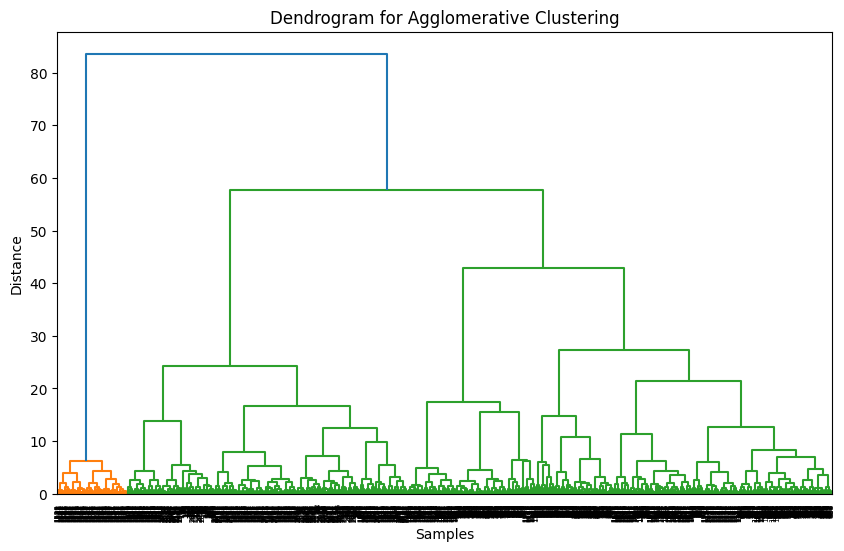

In [11]:
# Dendrogram for Agglomerative Clustering
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [8]:
# Analyze cluster characteristics
df['Cluster'] = kmeans_labels
cluster_summary = df.groupby('Cluster')[['N', 'P', 'K', 'ph']].mean()
print("\nCluster Characteristics:")
print(cluster_summary)




Cluster Characteristics:
                 N           P           K        ph
Cluster                                             
0        32.158462   52.972308   33.238462  7.214586
1        95.673657   41.825688   37.939712  6.484579
2        22.000000   41.529813   26.192504  5.792303
3        21.990000  133.375000  200.000000  5.977800


In [9]:
# Validate clusters with crop types
crop_cluster = df.groupby('Cluster')['crop'].value_counts().unstack().fillna(0)
print("\nCrop Distribution per Cluster:")
print(crop_cluster)




Crop Distribution per Cluster:
crop     apple  banana  blackgram  chickpea  coconut  coffee  cotton  grapes  \
Cluster                                                                        
0          0.0     0.0      100.0      87.0      0.0     0.0     0.0     0.0   
1          0.0   100.0        0.0       4.0      0.0   100.0   100.0     0.0   
2          0.0     0.0        0.0       9.0    100.0     0.0     0.0     0.0   
3        100.0     0.0        0.0       0.0      0.0     0.0     0.0   100.0   

crop     jute  kidneybeans  ...  mango  mothbeans  mungbean  muskmelon  \
Cluster                     ...                                          
0        19.0          0.0  ...   12.0       55.0      69.0        0.0   
1        80.0          0.0  ...    0.0        0.0       0.0      100.0   
2         1.0        100.0  ...   88.0       45.0      31.0        0.0   
3         0.0          0.0  ...    0.0        0.0       0.0        0.0   

crop     orange  papaya  pigeonpeas  pomeg

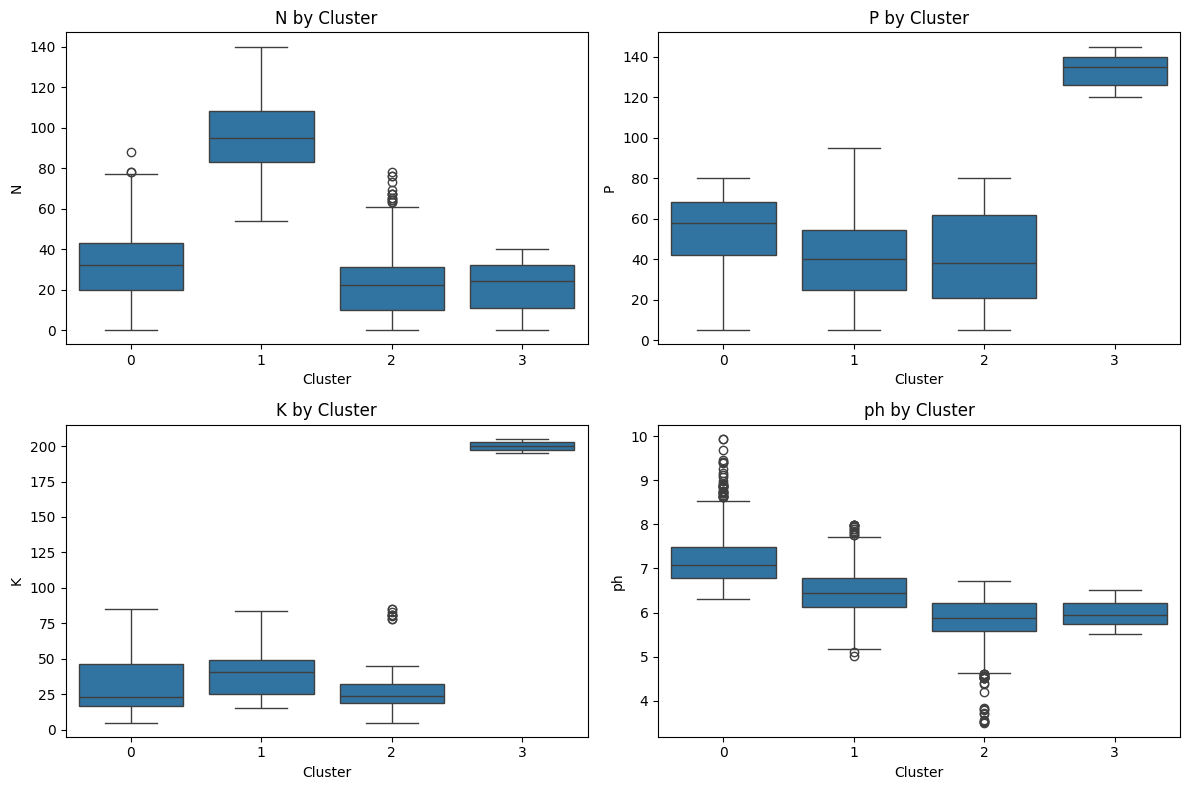

In [10]:
# Plot feature distributions per cluster
plt.figure(figsize=(12, 8))
for i, col in enumerate(['N', 'P', 'K', 'ph']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'{col} by Cluster')
plt.tight_layout()
plt.show()



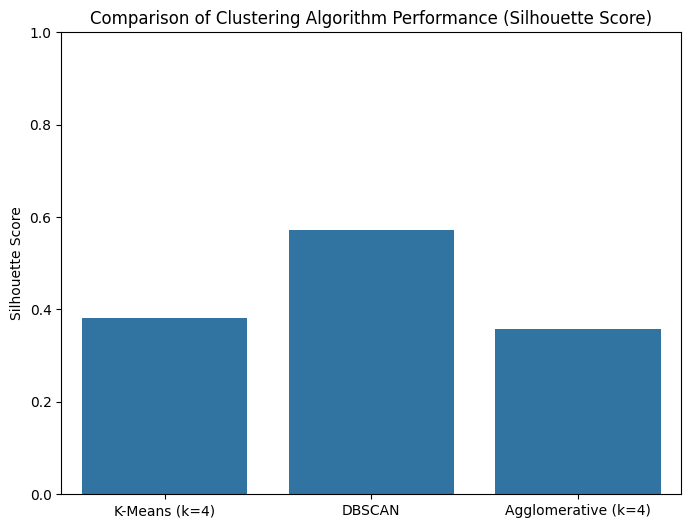

In [13]:


import matplotlib.pyplot as plt
# Visualize Silhouette Scores for Comparison
model_names = ['K-Means (k=4)', 'DBSCAN', 'Agglomerative (k=4)']
silhouette_scores = [kmeans_silhouette, dbscan_silhouette, agg_silhouette]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=silhouette_scores)
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Algorithm Performance (Silhouette Score)')
plt.ylim(0, 1) # Silhouette scores range from -1 to 1, but usually > 0 for good clustering
plt.show()